In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import PchipInterpolator



A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\Diego\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\Diego\AppData\Roaming\Python\Python312\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\Diego\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelapp.py", line 739, in start
    self.io_lo

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\Diego\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\Diego\AppData\Roaming\Python\Python312\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\Diego\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelapp.py", line 739, in start
    self.io_lo

ImportError: 
A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.



In [3]:
df = pd.DataFrame()

In [4]:
pd.set_option('display.max_rows', 10)

In [5]:
X_rank = range(-7,7+1,1)
df['X'] = X_rank
X_interp = range(-5,5+1,1)

In [6]:
df['X'] = X_rank
def f(x):
    return x**2
df['y'] = f(df['X'])
df

,X,y
0,-7,49
1,-6,36
2,-5,25
3,-4,16
4,-3,9
...,...,...
10,3,9
11,4,16
12,5,25
13,6,36


In [7]:
df_enlarged = pd.DataFrame()
df_enlarged['X'] = np.linspace(min(X_rank),max(X_rank),100)
df_enlarged = pd.concat([df, df_enlarged])
df_enlarged = df_enlarged.drop_duplicates('X')
df_enlarged = df_enlarged.sort_values('X').reset_index(drop=True)
df_enlarged

,X,y
0,-7.000000,49.0
1,-6.858586,NaN
2,-6.717172,NaN
3,-6.575758,NaN
4,-6.434343,NaN
...,...,...
108,6.434343,NaN
109,6.575758,NaN
110,6.717172,NaN
111,6.858586,NaN


In [8]:
df_enlarged_cap = df_enlarged.loc[(df_enlarged['X'] >= min(X_interp)) & (df_enlarged['X'] <= max(X_interp))]
df_enlarged_cap['y_piecewise'] = df_enlarged_cap['y']
df_enlarged_cap['y_pchip'] = df_enlarged_cap['y']
df_enlarged_cap['y_piecewise'] = np.interp(
    df_enlarged_cap['X'], 
    df_enlarged_cap.dropna()['X'], 
    df_enlarged_cap.dropna()['y_piecewise'],
)
df_enlarged_cap

C:\Users\Diego\AppData\Local\Temp\ipykernel_14732\2001109511.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_enlarged_cap['y_piecewise'] = df_enlarged_cap['y']
C:\Users\Diego\AppData\Local\Temp\ipykernel_14732\2001109511.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_enlarged_cap['y_pchip'] = df_enlarged_cap['y']
C:\Users\Diego\AppData\Local\Temp\ipykernel_14732\2001109511.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

,X,y,y_piecewise,y_pchip
16,-5.000000,25.0,25.000000,25.0
17,-4.878788,NaN,23.909091,NaN
18,-4.737374,NaN,22.636364,NaN
19,-4.595960,NaN,21.363636,NaN
20,-4.454545,NaN,20.090909,NaN
...,...,...,...,...
92,4.454545,NaN,20.090909,NaN
93,4.595960,NaN,21.363636,NaN
94,4.737374,NaN,22.636364,NaN
95,4.878788,NaN,23.909091,NaN


In [9]:
interp_pchip = PchipInterpolator(
    df_enlarged_cap.dropna()['X'],  # Valores X sin NaN
    df_enlarged_cap.dropna()['y_pchip'],  # Valores Y sin NaN
    axis=0,
    extrapolate=True  # O True en vez de 1
)

df_enlarged_cap['y_pchip'] = interp_pchip(df_enlarged_cap['X'])

df_enlarged_cap

C:\Users\Diego\AppData\Local\Temp\ipykernel_14732\209457249.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_enlarged_cap['y_pchip'] = interp_pchip(df_enlarged_cap['X'])


,X,y,y_piecewise,y_pchip
16,-5.000000,25.0,25.000000,25.000000
17,-4.878788,NaN,23.909091,23.800957
18,-4.737374,NaN,22.636364,22.436353
19,-4.595960,NaN,21.363636,21.110683
20,-4.454545,NaN,20.090909,19.826071
...,...,...,...,...
92,4.454545,NaN,20.090909,19.826071
93,4.595960,NaN,21.363636,21.110683
94,4.737374,NaN,22.636364,22.436353
95,4.878788,NaN,23.909091,23.800957


In [10]:
df_enlarged_cap['y'] = f(df_enlarged_cap['X'])
df_enlarged_cap

C:\Users\Diego\AppData\Local\Temp\ipykernel_14732\1119305243.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_enlarged_cap['y'] = f(df_enlarged_cap['X'])


,X,y,y_piecewise,y_pchip
16,-5.000000,25.000000,25.000000,25.000000
17,-4.878788,23.802571,23.909091,23.800957
18,-4.737374,22.442710,22.636364,22.436353
19,-4.595960,21.122845,21.363636,21.110683
20,-4.454545,19.842975,20.090909,19.826071
...,...,...,...,...
92,4.454545,19.842975,20.090909,19.826071
93,4.595960,21.122845,21.363636,21.110683
94,4.737374,22.442710,22.636364,22.436353
95,4.878788,23.802571,23.909091,23.800957


In [11]:
df_complete = df_enlarged.merge(df_enlarged_cap, how='left', on='X')
df_complete.drop(columns='y_x', inplace=True)
df_complete = df_complete.rename(columns={'y_y': 'y'})
df_complete['y'] = f(df_complete['X'])
df_complete

,X,y,y_piecewise,y_pchip
0,-7.000000,49.000000,NaN,NaN
1,-6.858586,47.040200,NaN,NaN
2,-6.717172,45.120396,NaN,NaN
3,-6.575758,43.240588,NaN,NaN
4,-6.434343,41.400775,NaN,NaN
...,...,...,...,...
108,6.434343,41.400775,NaN,NaN
109,6.575758,43.240588,NaN,NaN
110,6.717172,45.120396,NaN,NaN
111,6.858586,47.040200,NaN,NaN


In [12]:
# Calcular la pendiente al principio del dataset
first_non_nan_index = df_complete['y_piecewise'].first_valid_index()
second_non_nan_index = first_non_nan_index + 1

slope_start = (df_complete.loc[second_non_nan_index, 'y_piecewise'] - df_complete.loc[first_non_nan_index, 'y_piecewise']) / \
              (df_complete.loc[second_non_nan_index, 'X'] - df_complete.loc[first_non_nan_index, 'X'])

# Calcular la pendiente al final del dataset
last_non_nan_index = df_complete['y_piecewise'].last_valid_index()
second_last_non_nan_index = last_non_nan_index - 1

slope_end = (df_complete.loc[last_non_nan_index, 'y_piecewise'] - df_complete.loc[second_last_non_nan_index, 'y_piecewise']) / \
            (df_complete.loc[last_non_nan_index, 'X'] - df_complete.loc[second_last_non_nan_index, 'X'])

# Extrapolar al principio del dataset
df_complete.loc[:first_non_nan_index, 'y_piecewise'] = df_complete.loc[first_non_nan_index, 'y_piecewise'] + \
                                              slope_start * (df_complete.loc[:first_non_nan_index, 'X'] - df_complete.loc[first_non_nan_index, 'X'])

# Extrapolar al final del dataset
df_complete.loc[last_non_nan_index:, 'y_piecewise'] = df_complete.loc[last_non_nan_index, 'y_piecewise'] + \
                                             slope_end * (df_complete.loc[last_non_nan_index:, 'X'] - df_complete.loc[last_non_nan_index, 'X'])

df_complete


,X,y,y_piecewise,y_pchip
0,-7.000000,49.000000,43.000000,NaN
1,-6.858586,47.040200,41.727273,NaN
2,-6.717172,45.120396,40.454545,NaN
3,-6.575758,43.240588,39.181818,NaN
4,-6.434343,41.400775,37.909091,NaN
...,...,...,...,...
108,6.434343,41.400775,37.909091,NaN
109,6.575758,43.240588,39.181818,NaN
110,6.717172,45.120396,40.454545,NaN
111,6.858586,47.040200,41.727273,NaN


In [13]:
df_complete['y_pchip'] = interp_pchip(df_complete['X'])

df_complete

,X,y,y_piecewise,y_pchip
0,-7.000000,49.000000,43.000000,47.500000
1,-6.858586,47.040200,41.727273,45.805884
2,-6.717172,45.120396,40.454545,44.118888
3,-6.575758,43.240588,39.181818,42.441133
4,-6.434343,41.400775,37.909091,40.774741
...,...,...,...,...
108,6.434343,41.400775,37.909091,40.774741
109,6.575758,43.240588,39.181818,42.441133
110,6.717172,45.120396,40.454545,44.118888
111,6.858586,47.040200,41.727273,45.805884


[]

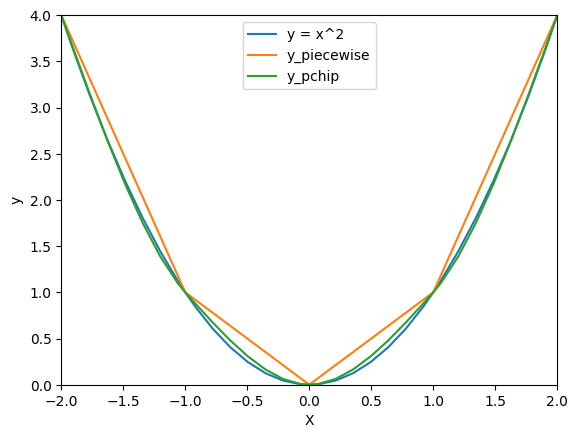

In [14]:
sns.lineplot(data=df_complete, x=df_complete['X'], y=df_complete['y'], label='y = x^2')
sns.lineplot(data=df_complete, x=df_complete['X'], y=df_complete['y_piecewise'], label='y_piecewise')
sns.lineplot(data=df_complete, x=df_complete['X'], y=df_complete['y_pchip'], label='y_pchip')

plt.xlim(-2, 2)
plt.ylim(0, 4)

plt.plot()

[]

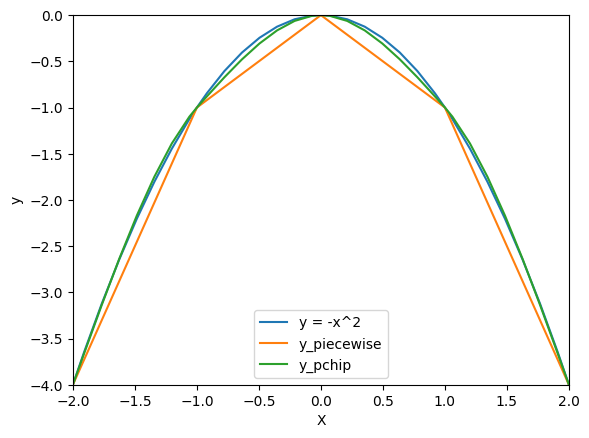

In [15]:
sns.lineplot(data=df_complete, x=-df_complete['X'], y=-df_complete['y'], label='y = -x^2')
sns.lineplot(data=df_complete, x=-df_complete['X'], y=-df_complete['y_piecewise'], label='y_piecewise')
sns.lineplot(data=df_complete, x=-df_complete['X'], y=-df_complete['y_pchip'], label='y_pchip')

plt.xlim(-2, 2)
plt.ylim(-4, 0)

plt.plot()

[]

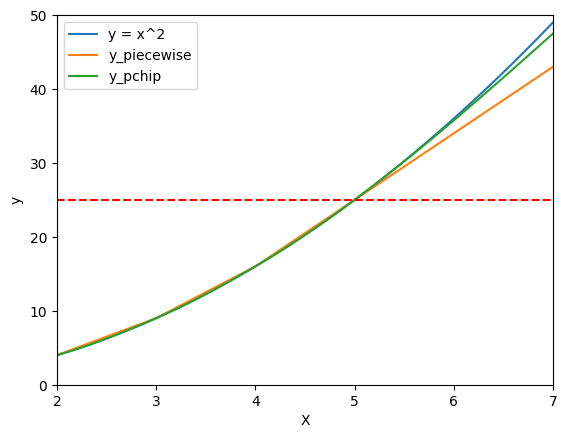

In [16]:
sns.lineplot(data=df_complete, x=df_complete['X'], y=df_complete['y'], label='y = x^2')
sns.lineplot(data=df_complete, x=df_complete['X'], y=df_complete['y_piecewise'], label='y_piecewise')
sns.lineplot(data=df_complete, x=df_complete['X'], y=df_complete['y_pchip'], label='y_pchip')
plt.axhline(y=25, color='red', linestyle='--', label='y = 25')

plt.xlim(2, 7)
plt.ylim(0, 50)

plt.plot()